In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd

In [2]:
import ast

# Чтение данных из файла
with open('train_data.txt', 'r') as f:
    data_str = f.read()

# Преобразование строки в список списков
data = ast.literal_eval(data_str)

# Преобразование списка в numpy array
array = np.array(data)

print(array[0][0])


16.0


In [3]:
for i in range(len(array)):
    array[i][0] = int(array[i][0])
    array[i][1] = int(array[i][1])
    array[i][2] = int(array[i][2])
    

In [4]:
print(array[0][0])

16.0


In [5]:
df = pd.DataFrame(data)
print(df)

       0    1     2          3         4
0     16   16   100   7.683021  9.528285
1     16   16   200  14.212306  8.751103
2     16   16   300  21.059893  5.677731
3     16   16   400  27.195578  5.634722
4     16   16   500  33.898726  4.931872
..   ...  ...   ...        ...       ...
635  128  128   600  40.915636  3.769969
636  128  128   700  47.071183  3.840433
637  128  128   800  54.967753  3.889842
638  128  128   900  61.273440  3.576234
639  128  128  1000  68.340546  3.716868

[640 rows x 5 columns]


In [6]:
new_column_names = ['Layer 1', 'Layer 2', 'Epochs', 'Time', 'Mean absolute error [csMPa]']
df = df.rename(columns=dict(zip(df.columns, new_column_names)))
print(df)

     Layer 1  Layer 2  Epochs       Time  Mean absolute error [csMPa]
0         16       16     100   7.683021                     9.528285
1         16       16     200  14.212306                     8.751103
2         16       16     300  21.059893                     5.677731
3         16       16     400  27.195578                     5.634722
4         16       16     500  33.898726                     4.931872
..       ...      ...     ...        ...                          ...
635      128      128     600  40.915636                     3.769969
636      128      128     700  47.071183                     3.840433
637      128      128     800  54.967753                     3.889842
638      128      128     900  61.273440                     3.576234
639      128      128    1000  68.340546                     3.716868

[640 rows x 5 columns]


In [7]:
min_mae_index = df['Mean absolute error [csMPa]'].idxmin()

# Получить строку с минимальным 'Mean absolute error [csMPa]'
min_mae_row = df.loc[min_mae_index]

# Вывести строку
print(min_mae_row)

Layer 1                        128.000000
Layer 2                        128.000000
Epochs                         900.000000
Time                            61.273440
Mean absolute error [csMPa]      3.576234
Name: 638, dtype: float64


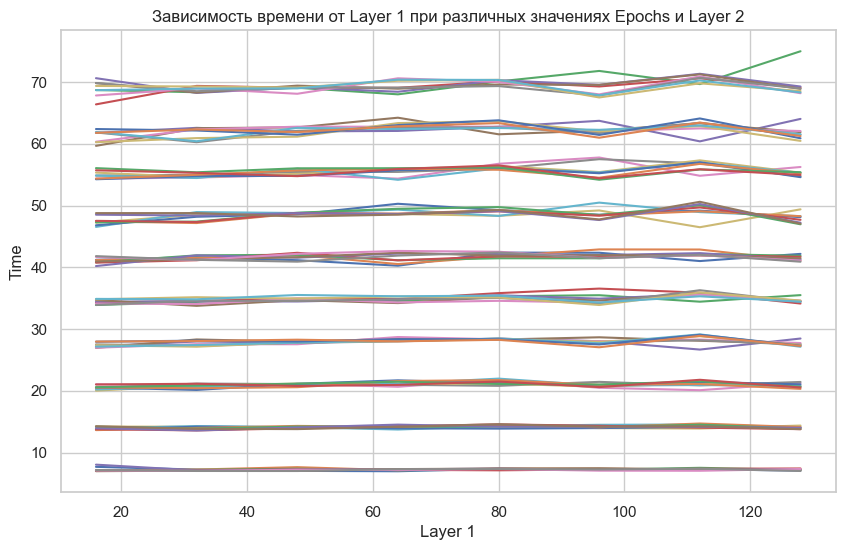

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем стиль графика
sns.set(style="whitegrid")

# Создаем фигуру и оси для графика
plt.figure(figsize=(10, 6))

# Группируем данные по значениям epochs и layer2 и строим график для каждой группы
for (epochs, layer2), group_df in df.groupby(['Epochs', 'Layer 2']):
    plt.plot(group_df['Layer 1'], group_df['Time'], label=f'Epochs={epochs}, Layer2={layer2}')

# Настройка заголовка и меток осей
plt.title('Зависимость времени от Layer 1 при различных значениях Epochs и Layer 2')
plt.xlabel('Layer 1')
plt.ylabel('Time')


# Отображаем график
plt.show()


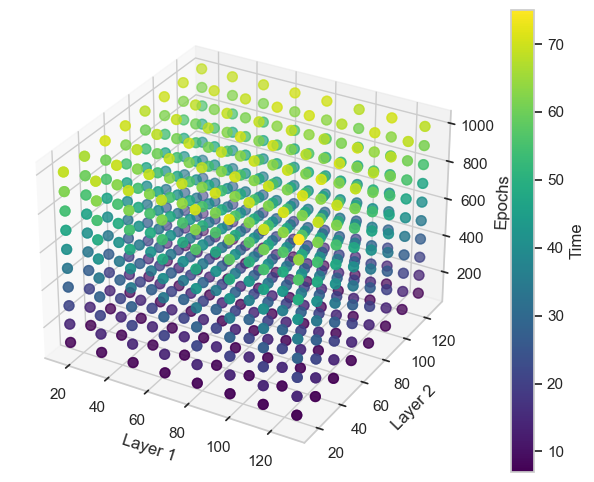

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем экземпляр объекта для трехмерного графика
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Настраиваем оси и метки
ax.set_xlabel('Layer 1')
ax.set_ylabel('Layer 2')
ax.set_zlabel('Epochs')

# Передаем данные для создания трехмерного графика
ax.scatter(df['Layer 1'], df['Layer 2'], df['Epochs'], c=df['Time'], cmap='viridis', s=50)

# Добавляем цветовую шкалу
cbar = plt.colorbar(ax.scatter(df['Layer 1'], df['Layer 2'], df['Epochs'], c=df['Time'], cmap='viridis', s=50))
cbar.set_label('Time')

# Отображаем график
plt.show()


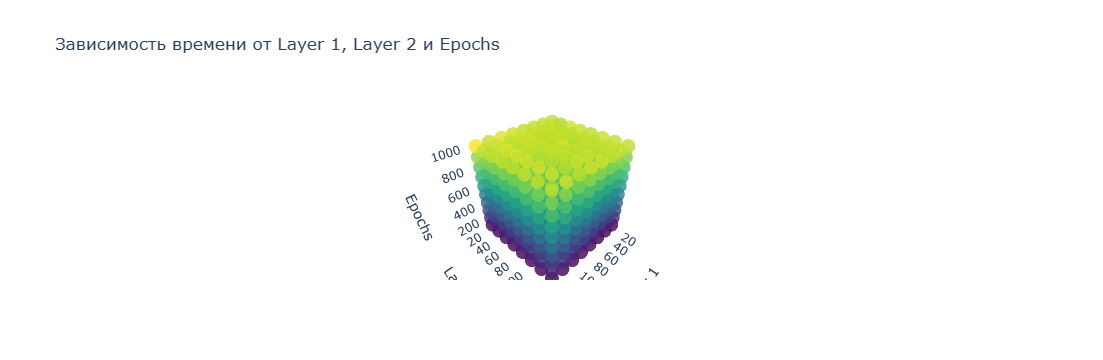

In [13]:
import plotly.graph_objects as go

# Создаем трехмерный график
fig = go.Figure(data=[go.Scatter3d(
    x=df['Layer 1'],
    y=df['Layer 2'],
    z=df['Epochs'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Time'],                # Устанавливаем цвет точек в зависимости от времени
        colorscale='viridis',   # Устанавливаем цветовую карту
        opacity=0.8
    )
)])

# Настраиваем метки осей
fig.update_layout(scene=dict(
                    xaxis_title='Layer 1',
                    yaxis_title='Layer 2',
                    zaxis_title='Epochs'),
                  )

# Добавляем заголовок графика
fig.update_layout(title='Зависимость времени от Layer 1, Layer 2 и Epochs')

# Отображаем график
fig.show()


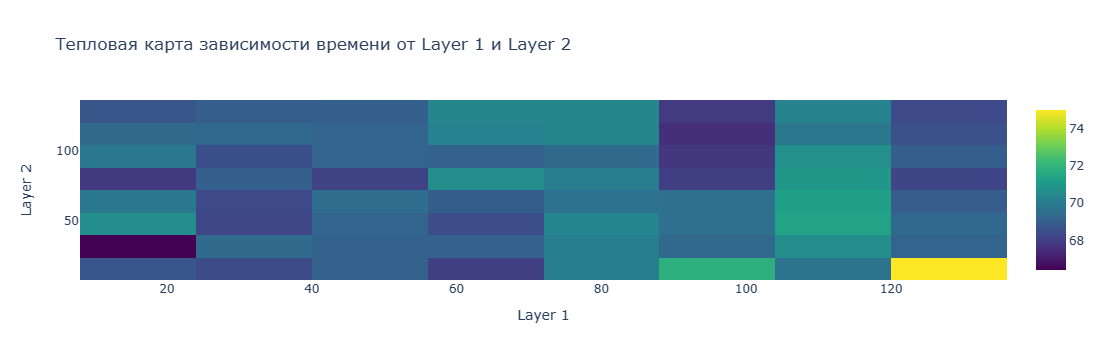

In [14]:
import plotly.graph_objects as go

# Создаем тепловую карту
fig = go.Figure(data=go.Heatmap(
    z=df['Time'],  # Используем время в качестве данных для тепловой карты
    x=df['Layer 1'],
    y=df['Layer 2'],
    colorscale='Viridis'  # Устанавливаем цветовую карту
))

# Настраиваем метки осей
fig.update_layout(
    xaxis_title='Layer 1',
    yaxis_title='Layer 2',
    title='Тепловая карта зависимости времени от Layer 1 и Layer 2'
)

# Отображаем график
fig.show()


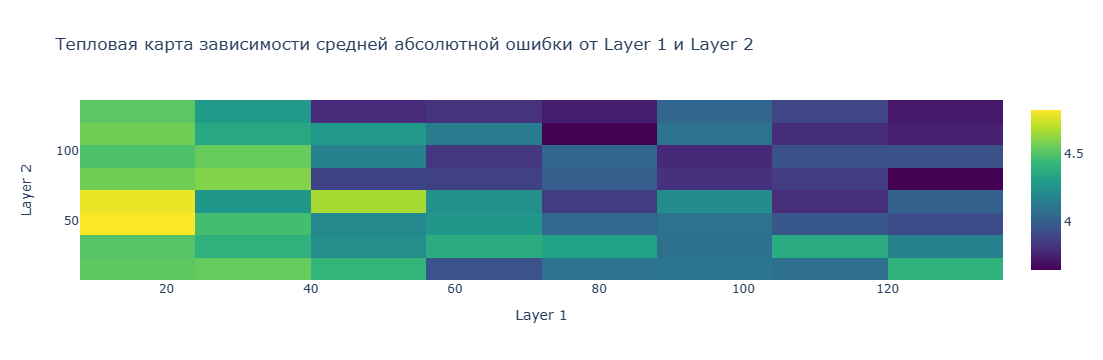

In [15]:
import plotly.graph_objects as go

# Создаем тепловую карту
fig = go.Figure(data=go.Heatmap(
    z=df['Mean absolute error [csMPa]'],  # Используем среднюю абсолютную ошибку в качестве данных для тепловой карты
    x=df['Layer 1'],
    y=df['Layer 2'],
    colorscale='Viridis'  # Устанавливаем цветовую карту
))

# Настраиваем метки осей
fig.update_layout(
    xaxis_title='Layer 1',
    yaxis_title='Layer 2',
    title='Тепловая карта зависимости средней абсолютной ошибки от Layer 1 и Layer 2'
)

# Отображаем график
fig.show()


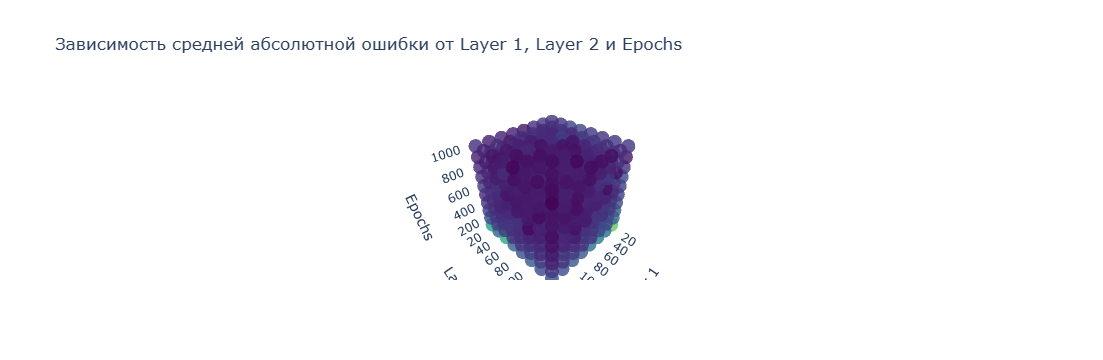

In [16]:
import plotly.graph_objects as go

# Создаем трехмерный график
fig = go.Figure(data=[go.Scatter3d(
    x=df['Layer 1'],
    y=df['Layer 2'],
    z=df['Epochs'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Mean absolute error [csMPa]'],  # Устанавливаем цвет точек в зависимости от средней абсолютной ошибки
        colorscale='viridis',                    # Устанавливаем цветовую карту
        opacity=0.8
    )
)])

# Настраиваем метки осей
fig.update_layout(scene=dict(
                    xaxis_title='Layer 1',
                    yaxis_title='Layer 2',
                    zaxis_title='Epochs'),
                  )

# Добавляем заголовок графика
fig.update_layout(title='Зависимость средней абсолютной ошибки от Layer 1, Layer 2 и Epochs')

# Отображаем график
fig.show()


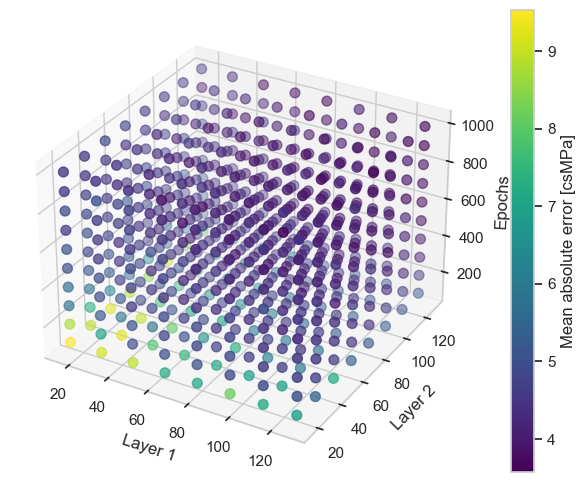

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем экземпляр объекта для трехмерного графика
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Настраиваем оси и метки
ax.set_xlabel('Layer 1')
ax.set_ylabel('Layer 2')
ax.set_zlabel('Epochs')

# Передаем данные для создания трехмерного графика
scatter = ax.scatter(df['Layer 1'], df['Layer 2'], df['Epochs'], c=df['Mean absolute error [csMPa]'], cmap='viridis', s=50)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Mean absolute error [csMPa]')

# Отображаем график
plt.show()
